In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
from collections import Counter

In [0]:
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
# Dataset is now stored in a Pandas Dataframe

In [0]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
df.shape

(150, 5)

In [0]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [0]:
Y = df['species']
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [0]:
X = df.drop('species', axis=1)

In [0]:
X.columns.values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [0]:
Xi = X[:100] #==> reducing it to a binary class problem for practice purpose. Considering only setosa and versicolor

In [0]:
Xi.shape

(100, 4)

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [0]:
Yi= Y[:100]

In [0]:
Yi.shape

(100,)

In [0]:
Yi

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
70    versicolor
71    versicolor
72    versicolor
73    versicolor
74    versicolor
75    versicolor
76    versicolor
77    versicolor
78    versicolor
79    versicolor
80    versicolor
81    versicolor
82    versicolor
83    versicolor
84    versicolor
85    versicolor
86    versicolor
87    versicolor
88    versicolor
89    versicolor
90    versicolor
91    versicolor
92    versicolor
93    versicolor
94    versicolor
95    versicolor
96    versicolor
97    versicol

In [0]:
le.fit(Yi)

LabelEncoder()

In [0]:
le.classes_

array(['setosa', 'versicolor'], dtype=object)

In [0]:
Yi=le.transform(Yi)

In [0]:
Yi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


In [0]:
X1, Xtest, Y1, Ytest = train_test_split(Xi, Yi, test_size=0.2, random_state=0)
Xtr, Xcv, Ytr, Ycv = train_test_split(X1, Y1, test_size=0.2, random_state=0)

In [0]:
auc_score = list()

In [0]:
#k FOR MAX AUC_SCORE

In [0]:
k=range(1,30,1)

for i in k:
  knn=neighbors.KNeighborsClassifier(n_neighbors=i)
  knn.fit(Xtr, Ytr)
  Ypred=knn.predict(Xcv)
  auc=roc_auc_score(Ycv, Ypred)
  auc_score.append(auc)

In [0]:
best_k=k[auc_score.index(max(auc_score))]

In [0]:
print("The k that results in best AUC score is {}".format(best_k))


The k that results in best AUC score is 1


In [0]:
#BEST k USING CROSS VALIDATION

In [0]:
from sklearn.model_selection import cross_val_score

k=range(1,30,1)
acc_score=list()

for i in k:
    knn=neighbors.KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn, X1, Y1, cv=3, scoring='accuracy')
    score.mean()
    acc_score.append(score.mean())
    
best_k2=k[acc_score.index(max(acc_score))]

In [0]:
print("The k that results in best CV score is {}".format(best_k2))


The k that results in best CV score is 1


In [0]:
#REPRESENTATION OF RESULTS

In [0]:
#1.Performance on train and cross validation data:
  print('The auc score at best k on CV data is {}'.format(max(auc_score)))
  print('The acc score at best k on CV data is {}'.format(max(acc_score)*100))

The auc score at best k on CV data is 1.0
The acc score at best k on CV data is 100.0


In [0]:
#Training our model-M using the best hyper-param and finding the AUC on test data:

In [0]:
knn_f=neighbors.KNeighborsClassifier(n_neighbors=best_k)
knn_f.fit(X1, Y1)
Y_pred=knn_f.predict(Xtest)
auc_f=roc_auc_score(Ytest, Y_pred)
print('The auc score on test data at k={} is {}'.format(best_k, auc_f))

The auc score on test data at k=1 is 1.0


In [0]:
knn_f2=neighbors.KNeighborsClassifier(n_neighbors=best_k2)
score=cross_val_score(knn_f2, X1, Y1, cv=3, scoring='accuracy')
score.mean()
acc_score=score.mean()
print('The auc score on test data at k={} is {}'.format(best_k2, acc_score))

The auc score on test data at k=1 is 1.0


In [0]:
#Plotting confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import numpy as np

Confusion matrix, without normalization
[[10  0]
 [ 0 10]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


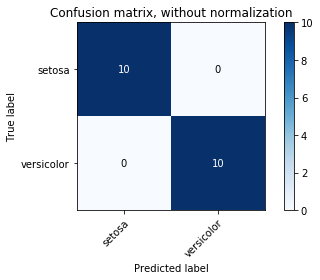

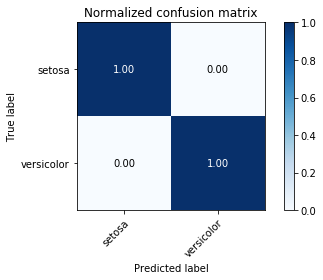

In [0]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

class_names=np.array(['setosa', 'versicolor'])

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(Ytest, Y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(Ytest, Y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(Ytest, Y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Ytest, Y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')


In [0]:
#Select K best features:=

In [0]:

from sklearn.feature_selection import SelectKBest, chi2

Xi.shape
X_new = SelectKBest(chi2, k=2).fit_transform(Xi, Yi)
X_new.shape
              

(100, 2)

In [0]:
X_1, X_t, Y_1, Y_t = train_test_split(X_new, Yi, test_size=0.2, random_state=0)
X_tr_1, X_cv1, Y_tr_1, Y_cv1 = train_test_split(X_1, Y_1, test_size=0.2, random_state=0)

In [0]:
X_1.shape

(80, 2)

In [0]:
Y_1.shape

(80,)

In [0]:
X_tr_1.shape

(64, 2)

In [0]:
Y_tr_1.shape

(64,)

In [0]:
auc_score_1=list()

In [0]:
#Max auc score:-

In [0]:
k=range(1,30,1)

for i in k:
  knn_k1=neighbors.KNeighborsClassifier(n_neighbors=i)
  knn_k1.fit(X_tr_1, Y_tr_1)
  Y_pred=knn_k1.predict(X_cv1)
  auc=roc_auc_score(Y_cv1, Y_pred)
  auc_score_1.append(auc)

In [0]:
best_k_1=k[auc_score_1.index(max(auc_score_1))]

In [0]:
print("The k that results in best AUC score on Reduced dataset is {}".format(best_k_1))

The k that results in best AUC score on Reduced dataset is 1


In [0]:
#Best K on the new dataset using CV:-

In [0]:
k=range(1,30,1)
acc_score_1=list()

for i in k:
    knn_k2=neighbors.KNeighborsClassifier(n_neighbors=i)
    score_1=cross_val_score(knn, X_1, Y_1, cv=3, scoring='accuracy')
    score_1.mean()
    acc_score_1.append(score_1.mean())
    
best_k_2=k[acc_score_1.index(max(acc_score_1))]

In [0]:
print("The k that results in the best CV score on the reduced dataset is {}".format(best_k_2))

The k that results in the best CV score on the reduced dataset is 1


In [0]:
#Training our model-M with reduced dataset using the best hyper-param and finding the AUC on test data:

In [0]:
knn_f_1=neighbors.KNeighborsClassifier(n_neighbors=best_k_1)
knn_f_1.fit(X_1, Y_1)
Y_pred_f1=knn_f_1.predict(X_t)
auc_f1=roc_auc_score(Y_t, Y_pred_f1)
print('The auc score on test data at k={} is {}'.format(best_k_1, auc_f1))

The auc score on test data at k=1 is 1.0


In [0]:
knn_f_2=neighbors.KNeighborsClassifier(n_neighbors=best_k_2)
score_2=cross_val_score(knn_f_2, X_1, Y_1, cv=3, scoring='accuracy')
score_2.mean()
acc_score_2=score.mean()
print('The CV score on test data at k={} is {}'.format(best_k_2, acc_score_2))

The CV score on test data at k=1 is 1.0


In [0]:
#Confusion matrix:-

Confusion matrix, without normalization
[[10  0]
 [ 0 10]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


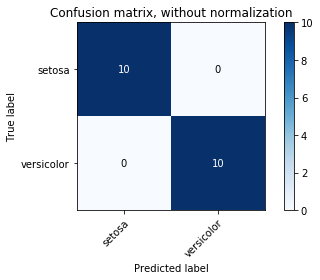

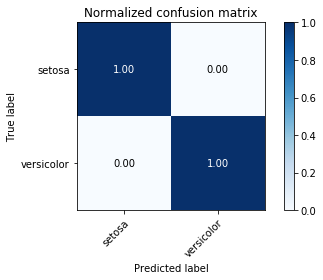

In [0]:
class_names=np.array(['setosa', 'versicolor'])

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(Y_t, Y_pred_f1)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(Y_t, Y_pred_f1)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_t, Y_pred_f1, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_t, Y_pred_f1, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
